# Libraries

In [1]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
import time

# Data Preparation

Note: Firstly I prepare data because of I must learn input which will apply to model. If I can understand data I can create network fluently and correctly in my opinion.

In [2]:
data = pd.read_csv("/Users/omeresadaltunel/Documents/DESKTOP/Python/Machine Learning/Deep Learning/CNN/digit-recognizer/train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.drop("label", axis=1).values
Y = data.label.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(35700, 784) (6300, 784)
(35700,) (6300,)


torch.Size([35700, 1, 28, 28])
torch.Size([35700])


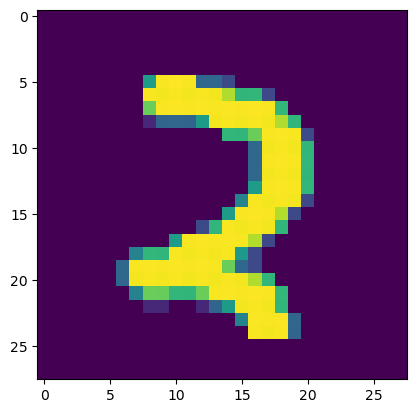

tensor(2)


In [4]:
tensor_x_train = torch.Tensor(x_train).view(-1, 1, 28, 28).float()
tensor_y_train = torch.Tensor(y_train).long()
print(tensor_x_train.shape)
print(tensor_y_train.shape)
t = 1
plt.imshow(tensor_x_train[t][0])
plt.show()
print(tensor_y_train[t])
tensor_x_test = torch.Tensor(x_test).view(-1, 1, 28, 28).float()
tensor_y_test = torch.Tensor(y_test).long()

In [5]:
train_set = TensorDataset(tensor_x_train, tensor_y_train)
test_set = TensorDataset(tensor_x_test, tensor_y_test)
x, y = train_set[1]
print(x[0].shape, "\n", y)

torch.Size([28, 28]) 
 tensor(2)


In [6]:
BATCH_SIZE = 64
train_loader = DataLoader(train_set, BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, BATCH_SIZE, shuffle=True)
print(len(train_loader), 6)

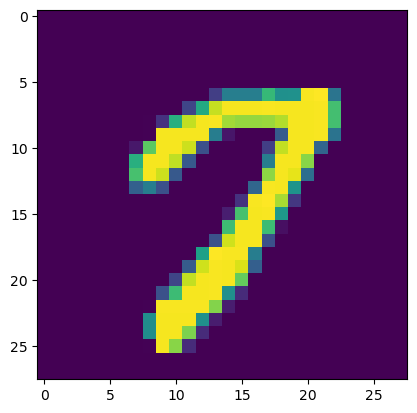

tensor(7)


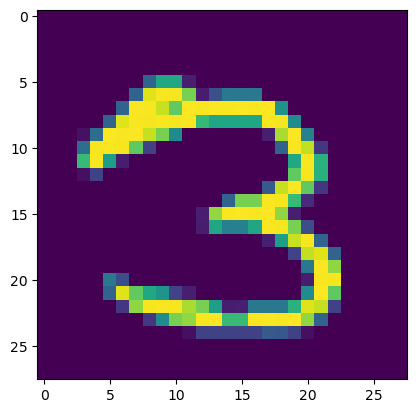

tensor(3)


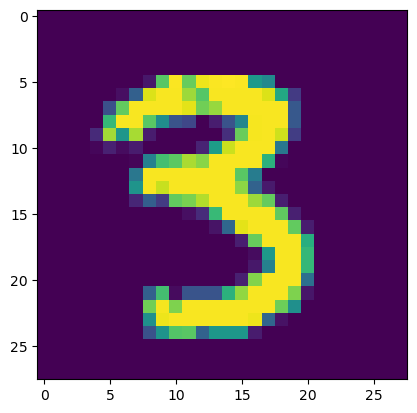

tensor(3)


In [7]:
x = 0
for data, target in train_loader:
    plt.imshow(data[0][0])
    plt.show()
    print(target[0])
    x += 1
    if x == 3:
        break
   


# NETWORK

In [44]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Adjusted pooling for downsampling
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1)
        self.linear = nn.Linear(32 * 10 * 10, 10)  # Adjusted linear layer input size

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.linear(x.view(-1, 32 * 10 * 10))  # Flatten the output before passing to linear layer
        return nn.functional.log_softmax(x, dim=1)


In [47]:
EPOCH = 5

def train(model, train_loader, epoch):
    correct = 0.0
    loss = 0.0
    


In [49]:
model = CNN()
train(model, train_loader, epochs=EPOCH)

Epoch [1/1], Step [139/558], Loss: 0.2187
Epoch [1/1], Step [278/558], Loss: 0.3702
Epoch [1/1], Step [417/558], Loss: 0.0560
Epoch [1/1], Step [556/558], Loss: 0.3044
Epoch [1/1], Loss: 0.4278, Accuracy: 92.91%
